In [2]:
import pandas as pd
from strategy import Strategy
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

df = Strategy.load_dataset('db.csv')
df = df.rename(columns={
        f"bet365_1X2 Full Time_outcome_{i}_closing_value": f"bet365_{i}" for i in range(1, 4)
})
def cpt_winner(g1, g2):
        if g1 > g2:
            return 1
        elif g1 < g2:
            return 3
        else:
            return 2
df['result'] = df[['score_ft_1', 'score_ft_2']].apply(lambda x: cpt_winner(x[0], x[1]), axis=1)


In [7]:
import os
strategies = os.listdir('strategies')
print(f"NUMBER: {len(strategies)}")
strategies.sort(key=lambda x: - os.path.getmtime(f'strategies/{x}'))
print('\n'.join(strategies))

NUMBER: 34
strategy_3M_H_GA_rank_coeff_1__3M_A_G_rank_coeff_2__3.json
strategy_3M_H_GA_rank_coeff_1__3M_A_G_rank_coeff_2__2.json
strategy_3M_H_GA_rank_coeff_1__3M_A_G_rank_coeff_2__1.json
strategy_3M_G_rank_coeff_1__3M_GA_rank_coeff_2__3.json
strategy_3M_G_rank_coeff_1__3M_GA_rank_coeff_2__2.json
strategy_3M_G_rank_coeff_1__3M_GA_rank_coeff_2__1.json
strategy_3M_P_rank_coeff_1__3M_P_rank_coeff_2__3.json
strategy_3M_P_rank_coeff_1__3M_P_rank_coeff_2__2.json
strategy_3M_P_rank_coeff_1__3M_P_rank_coeff_2__1.json
strategy_3M_H_P_rank_coeff_1__3M_A_P_rank_coeff_2__3.json
strategy_3M_H_P_rank_coeff_1__3M_A_P_rank_coeff_2__2.json
strategy_3M_H_P_rank_coeff_1__3M_A_P_rank_coeff_2__1.json
strategy_3M_H_G_rank_coeff_1__3M_A_GA_rank_coeff_2__3.json
strategy_3M_H_G_rank_coeff_1__3M_A_GA_rank_coeff_2__2.json
strategy_3M_H_G_rank_coeff_1__3M_A_GA_rank_coeff_2__1.json
strategy_H_G_rank_1__A_GA_rank_2__3.json
strategy_H_G_rank_1__A_GA_rank_2__2.json
strategy_H_G_rank_1__A_GA_rank_2__1.json
strategy_H_

In [8]:
dic = {}
for s in strategies:
    strategy = Strategy.load_strategy_from_file(f'strategies/{s}')
    matches, gain_by_year = Strategy.analyze_strategy(strategy, df)
    print(s)
    print(strategy)
    result = strategy.get('result')
    matches = matches.reset_index(drop=True)
    strategy_stats = {}
    strategy_stats["n_matches"] = len(matches)
    strategy_stats["total_revenue"] = matches.gain.sum()
    strategy_stats["roi"] = matches.gain.sum() / len(matches) * 100
    strategy_stats["n_wins"] = len(matches[matches.result == result])
    strategy_stats["winning_rate"] = len(matches[matches.result == result]) / len(matches) * 100
    strategy_stats["avg_odd"] = matches[f'bet365_{result}'].mean()
    
    print(strategy_stats)
    dic[s] = strategy_stats

    #print(f'Number of matches: {len(matches)}')
    #print(f'Total revenue (with 1 euro bets): {matches.gain.sum()}')
    #print(f'ROI: {matches.gain.sum() / len(matches) * 100}%')
    #print(f'Winning bets: {len(matches[matches.result == result])} / {len(matches)}')
    #print(f'Winning rate: {len(matches[matches.result == result]) / len(matches) * 100} %')
    #print(f"Average odd: {matches[f'bet365_{result}'].mean()}")

strategy_3M_H_GA_rank_coeff_1__3M_A_G_rank_coeff_2__3.json
{'3M_H_GA_rank_coeff_1': [18, 26], '3M_A_G_rank_coeff_2': [20, 26], 'result': 3, 'bet365_3': [3.37, 8.47]}
{'n_matches': 728, 'total_revenue': 109.80999999999999, 'roi': 15.083791208791208, 'n_wins': 191, 'winning_rate': 26.236263736263737, 'avg_odd': 4.601991758241758}
strategy_3M_H_GA_rank_coeff_1__3M_A_G_rank_coeff_2__2.json
{'3M_H_GA_rank_coeff_1': [13, 21], '3M_A_G_rank_coeff_2': [8, 19], 'result': 2, 'bet365_2': [6.6, 8.93]}
{'n_matches': 130, 'total_revenue': 46.0, 'roi': 35.38461538461539, 'n_wins': 24, 'winning_rate': 18.461538461538463, 'avg_odd': 7.426923076923077}
strategy_3M_H_GA_rank_coeff_1__3M_A_G_rank_coeff_2__1.json
{'3M_H_GA_rank_coeff_1': [14, 26], '3M_A_G_rank_coeff_2': [1, 24], 'result': 1, 'bet365_1': [4.300000000000001, 9.84]}
{'n_matches': 3039, 'total_revenue': 367.62, 'roi': 12.096742349457058, 'n_wins': 614, 'winning_rate': 20.204014478446858, 'avg_odd': 5.803389272787101}
strategy_3M_G_rank_coeff_1_

strategy_3M_H_GA_rank_1__3M_A_G_rank_2__2.json
{'3M_H_GA_rank_1': [15, 25], '3M_A_G_rank_2': [8, 10], 'result': 2, 'bet365_2': [6.700000000000001, 9.17]}
{'n_matches': 17, 'total_revenue': 49.5, 'roi': 291.1764705882353, 'n_wins': 9, 'winning_rate': 52.94117647058824, 'avg_odd': 7.647058823529412}
strategy_3M_H_GA_rank_1__3M_A_G_rank_2__1.json
{'3M_H_GA_rank_1': [11, 25], '3M_A_G_rank_2': [1, 28], 'result': 1, 'bet365_1': [4.28, 9.879999999999999]}
{'n_matches': 4023, 'total_revenue': 390.25, 'roi': 9.700472284364901, 'n_wins': 790, 'winning_rate': 19.63708675118071, 'avg_odd': 5.837163808103404}
strategy_3M_P_rank_1__3M_P_rank_2__3.json
{'3M_P_rank_1': [13, 17], '3M_P_rank_2': [9, 15], 'result': 3, 'bet365_3': [5.07, 9.74]}
{'n_matches': 1893, 'total_revenue': 192.25, 'roi': 10.155837295298468, 'n_wins': 333, 'winning_rate': 17.591125198098258, 'avg_odd': 6.4418911780243}
strategy_3M_P_rank_1__3M_P_rank_2__2.json
{'3M_P_rank_1': [24, 28], '3M_P_rank_2': [3, 19], 'result': 2, 'bet365_2

In [9]:
dic = dict(sorted(dic.items(), key=lambda item: -item[1]["total_revenue"]))
print([(k, v["total_revenue"]) for k, v in dic.items()])

[('strategy_3M_H_GA_rank_1__3M_A_G_rank_2__1.json', 390.25), ('strategy_H_GA_rank_1__A_G_rank_2__1.json', 386.19999999999993), ('strategy_3M_H_GA_rank_coeff_1__3M_A_G_rank_coeff_2__1.json', 367.62), ('strategy_3M_G_rank_coeff_1__3M_GA_rank_coeff_2__1.json', 365.0799999999999), ('strategy_3M_P_rank_coeff_1__3M_P_rank_coeff_2__1.json', 353.38), ('strategy_3M_P_rank_coeff_1__3M_P_rank_coeff_2__3.json', 266.5), ('strategy_3M_H_G_rank_1__3M_A_GA_rank_2__1.json', 263.43999999999994), ('strategy_3M_P_rank_1__3M_P_rank_2__1.json', 230.49), ('strategy_H_G_rank_1__A_GA_rank_2__1.json', 198.73000000000002), ('strategy_H_P_rank_1__A_P_rank_2__1.json', 193.8), ('strategy_3M_P_rank_1__3M_P_rank_2__3.json', 192.25), ('strategy.json', 185.57999999999998), ('strategy_3M_H_G_rank_coeff_1__3M_A_GA_rank_coeff_2__3.json', 158.5), ('strategy_3M_G_rank_coeff_1__3M_GA_rank_coeff_2__3.json', 132.5), ('strategy_3M_H_G_rank_coeff_1__3M_A_GA_rank_coeff_2__2.json', 125.70000000000003), ('strategy_3M_H_P_rank_coeff

In [10]:
STRATEGY = 'strategy_3M_H_GA_rank_1__3M_A_G_rank_2__1.json'

In [11]:
strategy = Strategy.load_strategy_from_file(f'strategies/{STRATEGY}')
strategy

{'3M_H_GA_rank_1': [11, 25],
 '3M_A_G_rank_2': [1, 28],
 'result': 1,
 'bet365_1': [4.28, 9.879999999999999]}

In [13]:
matches, gain_by_year = Strategy.analyze_strategy(strategy, df)
result = strategy.get('result')
matches = matches.reset_index(drop=True)
print(f'Number of matches: {len(matches)}')
print(f'Total revenue (with 1 euro bets): {matches.gain.sum()}')
print(f'ROI: {matches.gain.sum() / len(matches) * 100}%')
print(f'Winning bets: {len(matches[matches.result == result])} / {len(matches)}')
print(f'Winning rate: {len(matches[matches.result == result]) / len(matches) * 100} %')
print(f"Average odd: {matches[f'bet365_{result}'].mean()}")
print()

Number of matches: 4023
Total revenue (with 1 euro bets): 390.25
ROI: 9.700472284364901%
Winning bets: 790 / 4023
Winning rate: 19.63708675118071 %
Average odd: 5.837163808103404



In [14]:
print('Odds distribution')
print(matches[f'bet365_{result}'].value_counts())

Odds distribution
5.00    426
4.50    405
4.33    390
4.75    389
5.50    357
6.00    349
6.50    292
7.00    261
5.25    236
7.50    223
8.00    169
5.75    138
8.50    133
9.00    118
9.50     64
4.60     42
4.59      9
6.25      7
4.40      6
4.80      5
6.75      2
6.20      1
5.60      1
Name: bet365_1, dtype: int64


<AxesSubplot:>

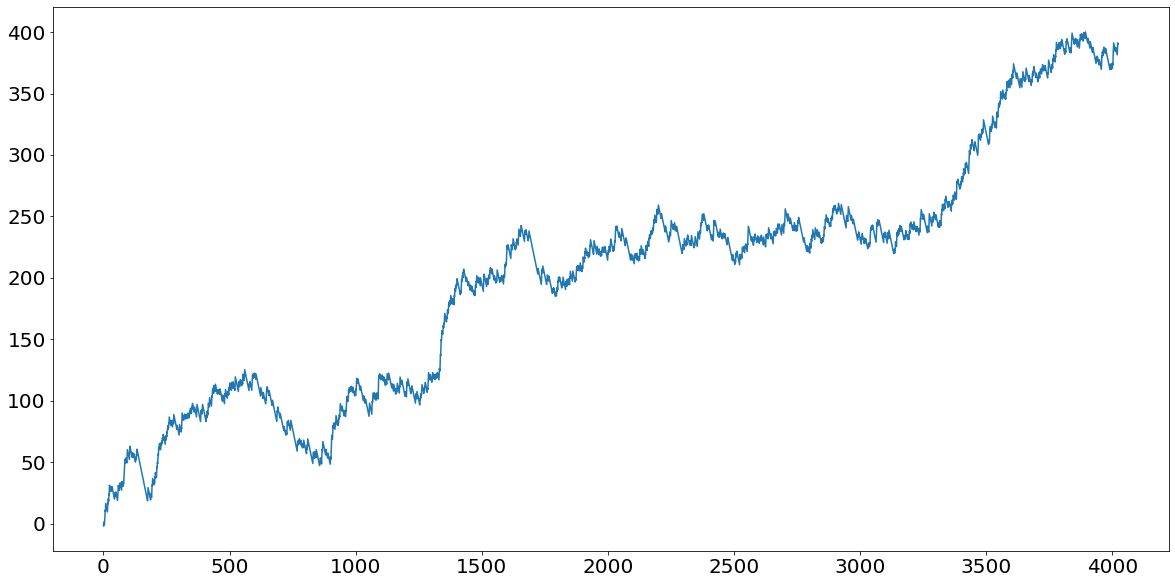

In [15]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = [20, 10]
matplotlib.rcParams.update({'font.size': 20})
matches.cum_gain.plot()

<AxesSubplot:xlabel='year'>

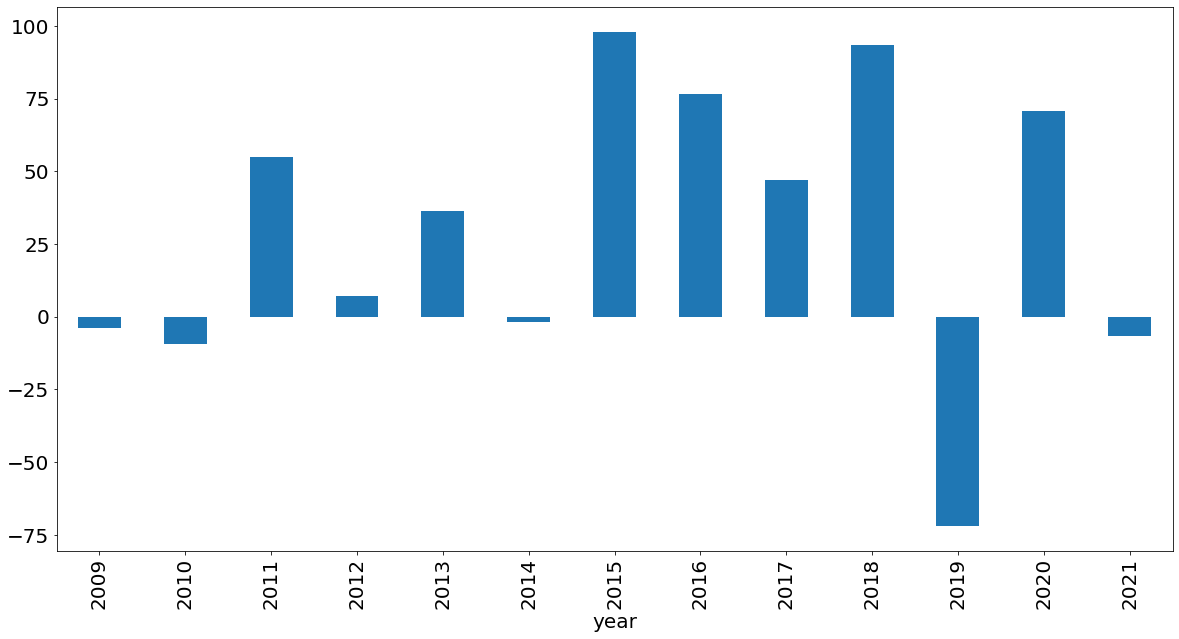

In [16]:
gain_by_year.plot.bar()

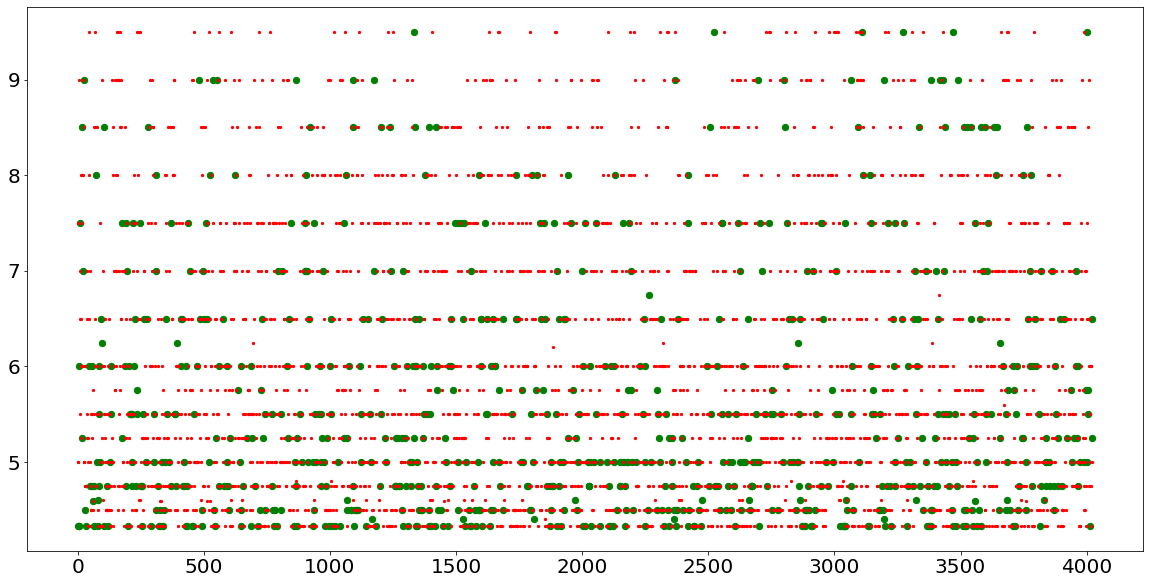

In [17]:
plt.scatter(x = matches[matches.gain > 0].index, y=matches[matches.gain > 0][f"bet365_{strategy.get('result')}"], s=40, color='green')
plt.scatter(x = matches[matches.gain < 0].index, y=matches[matches.gain < 0][f"bet365_{strategy.get('result')}"], color='red', s=5)

<AxesSubplot:xlabel='country'>

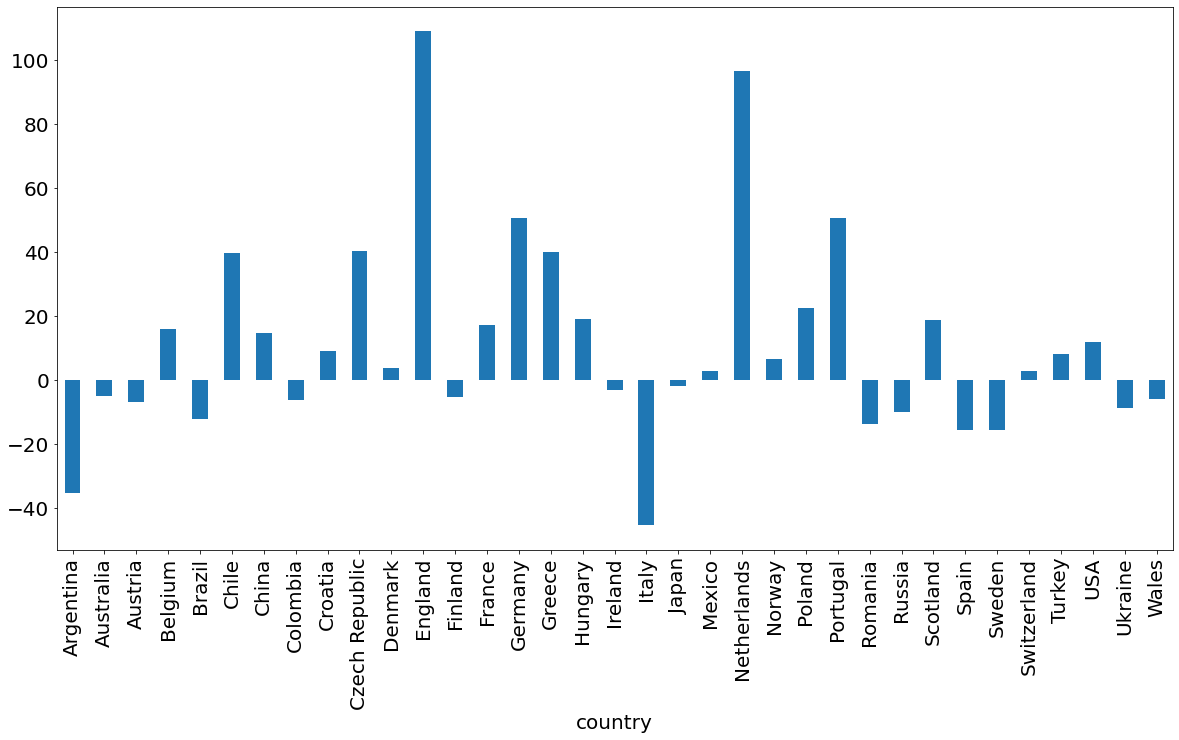

In [18]:
gain_by_country = matches.groupby(by='country')["gain"]
gain_by_country.sum().plot.bar()

<AxesSubplot:xlabel='league'>

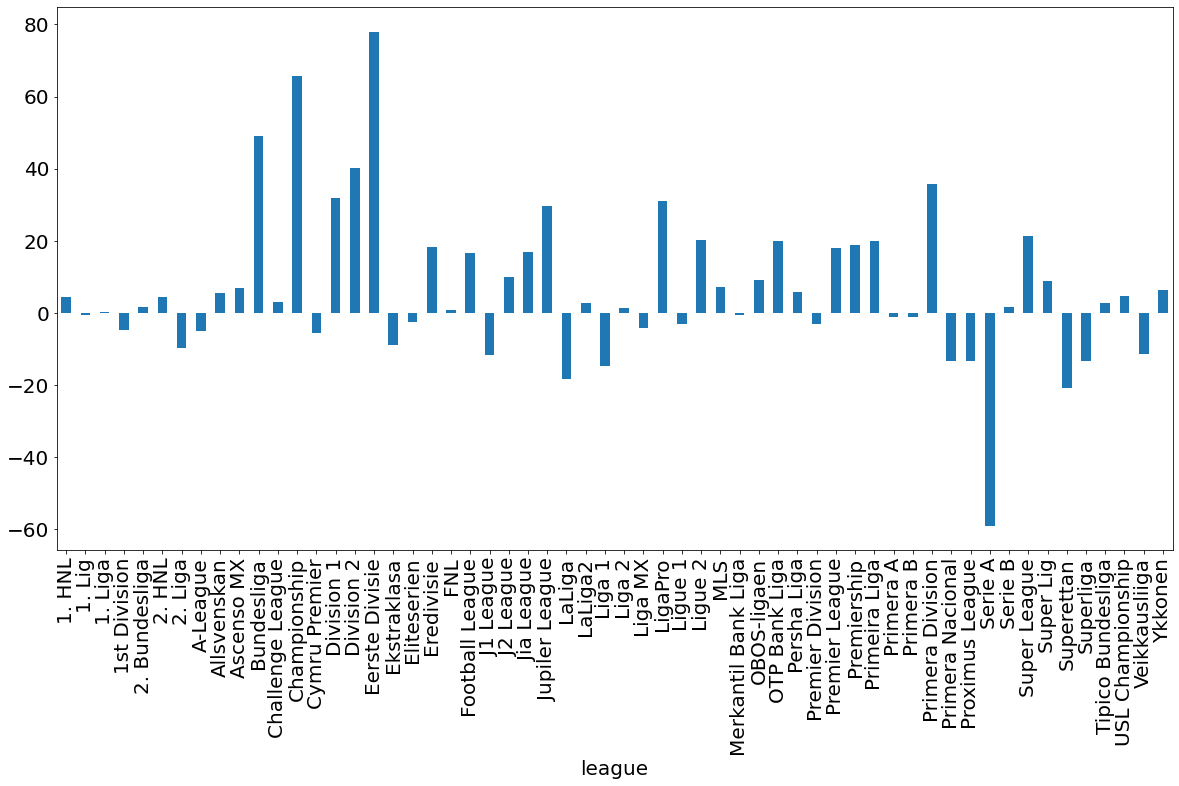

In [19]:
gain_by_league = matches.groupby(by='league')["gain"].sum()
gain_by_league.plot.bar()